In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import sympy  as sp
import numpy as np

intervalo = [0, 2]
particiones = [3, 10, 25, 100]

suma = []
error = []
puntos = []

magnitud = intervalo[1]-intervalo[0]

x = sp.Symbol('x')
valor_exacto = sp.integrate(x**3, (x, 0, 2))

tolerancia = 10**-3

def y(x):
    return x**3

def integral(x):
    return (x**4)/4

for val in particiones:
    Axi = magnitud/val
    xi_1 = intervalo[0]
    PT = 0
    axl = []
    
    while len(axl)<=val:
        ti = (xi_1*2 + Axi)/2
        xi_1 += Axi
        PT += y(ti)*Axi
        axl.append(PT)
  
    puntos.append(axl)  
    err = abs((valor_exacto-PT)/valor_exacto)  
    error.append(err)  
    suma.append(PT)
    
resultados = {
    'Particiones': particiones,
    'Suma':suma,
    'Error (%)':error,
     }

show_df = pd.DataFrame.from_dict(resultados, orient='index')
show_df = show_df.transpose()
show_df

,Particiones,Suma,Error (%)
0,3,12.246914,2.06172839506173
1,10,5.8322,0.458050000000000
2,25,4.675973,0.168993280000001
3,100,4.162212,0.0405530050000018


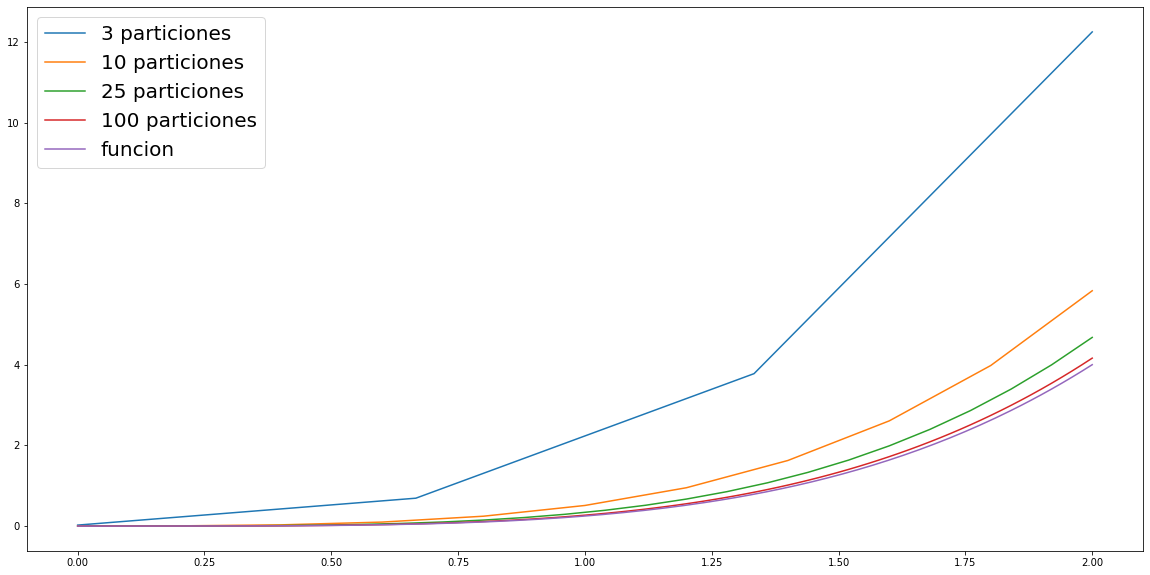

In [2]:
plt.figure(figsize=(20, 10))

for iterate in range(len(particiones)) :
    paso = magnitud/particiones[iterate]
    y = np.arange(0, (2+paso), paso)
    plt.plot(y,puntos[iterate])

m = np.linspace(0, 2, num=200)
plt.plot(m,integral(m))

plt.legend(('3 particiones', '10 particiones', '25 particiones', '100 particiones', 'funcion'),
prop = {'size': 20},)
plt.show()

# Suma de Riennam del punto medio.

Sea $f:[a,b]\Rightarrow \mathbb {R} f:[a,b]\Rightarrow \mathbb{R}$ una función acotada en el intervalo compacto $[a,b]$. Para cada partición $P=x_{0},x_{1},x_{2},...,x_{n}$ de $[a,b]$ llamaremos familia de puntos intermedios (asociada a $P$) a cualquiera de los conjuntos $ T=t_{1},t_{2},...,t_{n}$ formado por puntos $ t_{i} \in  [x_{i-1},x_{i}]$, para $ i=1,2,...,n$.

Se llama Suma de Riemann de ${f}$, relativa a la partición ${P}$ y a la correspondiente familia de puntos ${T}$, al número

${ \sigma (P,T)=\sum _{i=1}^{n}f(t_{i})\Delta x_{i}}$

Siendo $\Delta x_{i}=x_{i}-x_{i-1}$

y $ t_{i}=\dfrac{x_{i}+x_{i-1}}{2} $ para la suma de Riennam del punto medio

# Analisis de resultados.

Teniendo en cuenta lo investigado y segun los resultados obtenidos podemos observar que el metodo puede llegar a converger de manera muy acertada a la funcion, contando con una bajo error relativo cuando se toma un elevado numero de particiones dependiendo de la funcion, necesitando un minimo de $100$ particiones para llegar al resultado esperado de un error relativo menor $10^{-3}$

# Referencias bibliografica.

   Suma de Riemann. (2021, 2 marzo). En Wikipedia, la enciclopedia libre. https://es.wikipedia.org/wiki/Suma_de_Riemann